# Assignment 1 : Group 6 
 ##  **TEAM MEMBERS**  
* #### Danae Marais : 578326
* #### Vuyo Fortune Mathe : 578376
* #### Roan Palm : 578632
* #### Henko Meyer : 578420

## Import Libraries

In [2]:
!pip install opendatasets 
!pip install pandas

import pandas as pnda 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Import Datasets and Load data into Panda Framework

In [ ]:
dataset = pnda.read_csv('./Houseprices.csv')

# Exploring the Data and General Information on the Dataset

## Dataset

In [14]:
dataset

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


## Check the data types in Dataset

In [8]:
dataset.dtypes

Id             int64
SalePrice    float64
dtype: object

## Check for duplicate data

In [9]:
dataset.shape #Get the initial size of dataset matrix

(1459, 2)

In [10]:
duplicaterows = dataset[dataset.duplicated()]
print("Number of duplicate rows  :", duplicaterows.shape) #Check for duplicated data rows , [0 indicates no duplicate rows]

Number of duplicate rows  : (0, 2)


## Count the number of rows

In [11]:
dataset.count()

Id           1459
SalePrice    1459
dtype: int64

# Detect Outliers

In [16]:
import seaborn as cbrn  #Import Library to detect outliers

## Id column Outliers

<Axes: xlabel='Id'>

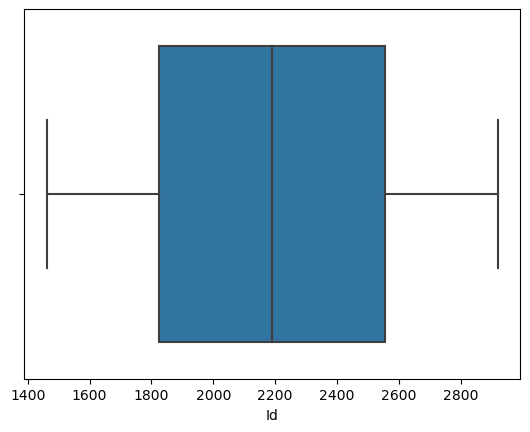

In [13]:
cbrn.boxplot(x=dataset['Id'])

## Saleprice Column Outliers

<Axes: xlabel='SalePrice'>

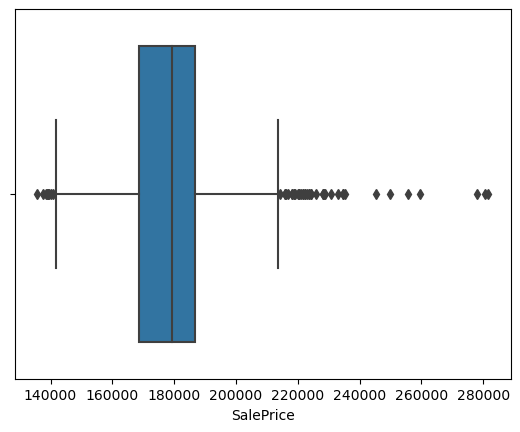

In [17]:
cbrn.boxplot(x=dataset['SalePrice'])

In [18]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

Id             729.000000
SalePrice    18086.398162
dtype: float64


In [19]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1))]
dataset.shape

(1459, 2)

# Check for Missing Data

In [ ]:
!pip install scikit-Learn 
from sklearn.impute import SimpleImputer 

imputer = SimpleImputebr(missing_values=np.nan , strategy = 'mean')
imputer.fit(X[:, 1:3])

X[:, 1:3] = imputer.transform(X[:, 1:3])

In [21]:
print(dataset.isnull().sum()) # Check for missing Data

Id           0
SalePrice    0
dtype: int64
